# Performance Metrics

**GOALS**:

- Compare Accuracy, Precision, and Recall metrics for different classifiers
- Examine the Precision Recall tradeoff and understand appropriate determination of thresholds
- Visualize Precision Recall tradeoff 
- Examine performance of multiclass classifiers

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata

### Digits Example

To begin, we will return to the MNIST handwritten digit dataset.  First, we examine a binary classifier for the data based on whether or not a digit is a 5.  

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [4]:
y = []
for label in mnist['target']:
    if label == 5:
        y.append(1)
    else:
        y.append(0)

In [37]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(mnist['data'], y)

In [39]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [8]:
lgr = LogisticRegression()
sgd = SGDClassifier()

In [9]:
lgr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
lgr.score(X_train, y_train)

0.9778666666666667

### An Alternative Classifier

Just for comparison, we can implement a Stochastic Gradient Descent classifier.  We will discuss the algorithm more next class, for now let's just use it to compare against our Logisitic Regression example.

In [11]:
sgd.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [12]:
sgd.score(X_train, y_train)

0.9663428571428572

### Comparing to Baseline

We can use the `DummyClassifier` to generate a baseline estimation that only guesses the majority class everytime regardless of the data.  This is akin to examining the baseline of a dataset.  Let's see how this example does.

In [13]:
from sklearn.dummy import DummyClassifier

In [14]:
dum_dum = DummyClassifier(strategy='most_frequent')

In [15]:
dum_dum.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [16]:
dum_dum.score(X_train,y_train)

0.9087238095238095

In [17]:
d_pred = dum_dum.predict(X_train)

Hmm. What's going on here?  It seems that simply guessing 0 gives a fairly "accurate" classifier.  This is because the accuracy is simply the number guessed correctly out of the total number of options.  In this example, 1 in 10 are 5's.  Let's consider the confusion matrix for a situation where there are 1000 digits and 100 of them are 5's.  

**CONFUSION MATRIX**

<table style="width:60%">
  <tr>
    <th> </th>
    <th>Predicted Negative</th> 
    <th>Predicted Positive</th>
  </tr>
  <tr>
    <td>Actually Negative</td>
    <td> True Negative</td> 
      <td> False Positive</td>

  </tr>
  <tr>
    <td>Actually Positive</td>
    <td>False Negative</td>
    <td>True Positive</td>
</table>

**EXAMPLE**

|     |  Predict Neg | Predict Pos |
| ----- | ----- | ------ |
| Really Negative |  900  |  0  |
| Really Positive | 100  |  0  |

In [18]:
#predicting sgd results
sgd_prd = sgd.predict(X_train)

In [19]:
#predicting logistic results
lgr_prd = lgr.predict(X_train)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
#sgd confustion matrix
confusion_matrix(y_train, sgd_prd)

array([[46850,   858],
       [  909,  3883]])

In [22]:
#logistic regression 
confusion_matrix(y_train, lgr_prd)

array([[47343,   365],
       [  797,  3995]])

In [23]:
#dummy predictor
confusion_matrix(y_train, d_pred)

array([[47708,     0],
       [ 4792,     0]])

### Beyond Accuracy

**Accuracy**: 

Percent classified correctly.

$$\displaystyle \frac{TP +TN}{TP + FP + TN + FN}$$



**Precision**:

More refined metrics begin with Precision, which is the proportion of positives that are really true positives.  Here, to increase precision, we want to decrease False Positive results.


 $$\displaystyle \frac{TP}{TP + FP}$$
 
 
**Recall**:

If we consider the number of true positives in terms of all the real positives, we have recall.  To get better recall, we want to avoid False Negatives.

 $$\displaystyle \frac{TP}{TP + FN}$$
 
 

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [25]:
print("Accuracy score for Logistic Regression model:\n{:.2f}".format(accuracy_score(y_train, lgr_prd)))
print("Accuracy score for SGD model: \n{:.2f}".format(accuracy_score(y_train, sgd_prd)))
print("Accuracy score for Dummy Classifer model: \n{:.2f}".format(accuracy_score(y_train, d_pred)))

Accuracy score for Logistic Regression model:
0.98
Accuracy score for SGD model: 
0.97
Accuracy score for Dummy Classifer model: 
0.91


In [26]:
print("Precision score for Logistic Regression model: \n", precision_score(y_train, lgr_prd))
print("Precision score for SGD model: \n", precision_score(y_train, sgd_prd))
print("Precision score for Dummy Classifer model: \n", precision_score(y_train, d_pred))

Precision score for Logistic Regression model: 
 0.9162844036697247
Precision score for SGD model: 
 0.8190255220417634
Precision score for Dummy Classifer model: 
 0.0


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
print("Recall score for Logistic Regression model: \n", recall_score(y_train, lgr_prd))
print("Recall score for SGD model: \n", recall_score(y_train, sgd_prd))
print("Recall score for Dummy Classifer model: \n", recall_score(y_train, d_pred))

Recall score for Logistic Regression model: 
 0.8336811352253757
Recall score for SGD model: 
 0.8103088480801336
Recall score for Dummy Classifer model: 
 0.0


In [28]:
print("Logistic Regression full report\n", classification_report(y_train,lgr_prd))

Logistic Regression full report
              precision    recall  f1-score   support

          0       0.98      0.99      0.99     47708
          1       0.92      0.83      0.87      4792

avg / total       0.98      0.98      0.98     52500



In [29]:
print("SGD full report\n", classification_report(y_train,sgd_prd))

SGD full report
              precision    recall  f1-score   support

          0       0.98      0.98      0.98     47708
          1       0.82      0.81      0.81      4792

avg / total       0.97      0.97      0.97     52500



In [30]:
print("Dummy full report\n", classification_report(y_train,d_pred))

Dummy full report
              precision    recall  f1-score   support

          0       0.91      1.00      0.95     47708
          1       0.00      0.00      0.00      4792

avg / total       0.83      0.91      0.87     52500



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Admissions Example

Now, let's predict the `admit` class from the `gre` variable.  Be sure to use a train test split and cross validation.

- Load Dataset
- Examine Variables
- Deal with missing and non-numeric
- Split
- Create Dummy Classifier
- Create and fit a Logistic Classifier with Cross Validation
- Compare and discuss the results

In [7]:
admissions = pd.read_csv('data/admissions.csv')

In [8]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [10]:
admissions.admit.value_counts()

0    273
1    127
Name: admit, dtype: int64

In [49]:
# fill in na gre
gre_not_admitted = admissions.gre[admissions.admit==0].mean()
admissions.gre.fillna(gre_not_admitted,inplace=True)

# fill in na gpa
admissions.gpa.fillna(admissions.gpa.mean(),inplace=True)

# fill in na prestige
prestige_admitted = admissions.prestige[admissions.admit==1].mode()
admissions.prestige.fillna(prestige_admitted,inplace=True)

In [30]:
import seaborn as sns

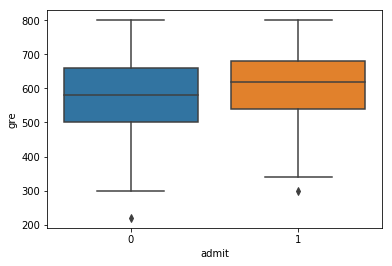

In [32]:
sns.boxplot(x='admit',y='gre',data=admissions)

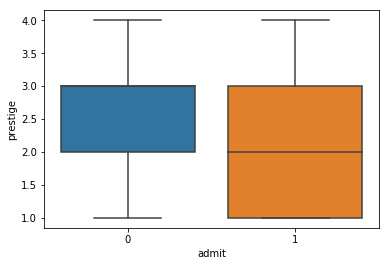

In [34]:
sns.boxplot(x='admit',y='prestige',data=admissions)

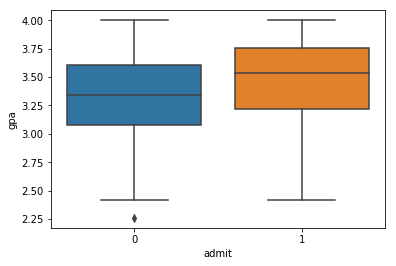

In [35]:
sns.boxplot(x='admit',y='gpa',data=admissions)

In [40]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [38]:
X = admissions[['gre']]
y = admissions.admit

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [43]:
lgr = LogisticRegression()

lgr.fit(X_train,y_train)
y_pred = lgr.predict(X_test)

print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.76      1.00      0.86        76
          1       0.00      0.00      0.00        24

avg / total       0.58      0.76      0.66       100



/Users/karenhao/Documents/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
